In [1]:
import numpy as np
import scipy.linalg
import random
import networkx as nx
import matplotlib.pyplot as plt
import planarity
import geopandas as gpd

In [2]:
def rand_adj_mat(size=2):
    m = np.zeros([size,size])
    for i in range(size):
        for j in range(i):
            b = random.randint(0,1)
            m[i,j] = b
            m[j,i] = b
    return m


def rand_conn_adj_mat(size=2):
    x  = 0
    while x == 0:
        m = rand_adj_mat(size)
        x = np.prod(scipy.linalg.eigvals(m)[0])
    return m

def rand_conn_er(size,p):
    c = False
    while not c:    
        m = nx.fast_gnp_random_graph(size,p)
        c = nx.is_connected(m)
    return nx.adjacency_matrix(m)

def rand_conn_nm(n,e):
    c = False
    while not c:
        m = nx.gnm_random_graph(n,e)
        c = nx.is_connected(m)
    print(planarity.is_planar(m))
    return nx.adjacency_matrix(m)

145000


(array([1.49330082e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.49330082e-04, 0.00000000e+00, 0.00000000e+00, 1.04531057e-03,
        0.00000000e+00, 0.00000000e+00, 1.79196099e-03, 3.73325205e-03,
        4.47990246e-04, 1.79196099e-03, 1.43356879e-02, 5.67454312e-03,
        5.07722279e-03, 2.68794148e-02, 3.68845303e-02, 2.37434831e-02,
        5.25641889e-02, 9.67658932e-02, 7.97422638e-02, 1.19016075e-01,
        1.69340313e-01, 1.72924235e-01, 1.97713029e-01, 2.29968326e-01,
        2.66404866e-01, 2.85071127e-01, 2.90297680e-01, 3.39576607e-01,
        3.38381966e-01, 3.55106935e-01, 3.68397313e-01, 3.68994633e-01,
        3.96919358e-01, 4.00951270e-01, 3.97666009e-01, 4.34998529e-01,
        4.23350783e-01, 4.38283791e-01, 4.36790490e-01, 4.41718383e-01,
        4.36939820e-01, 4.59637993e-01, 4.53216799e-01, 4.58891342e-01,
        4.59787323e-01, 4.54859430e-01, 4.66955167e-01, 4.66059186e-01,
        4.73675020e-01, 4.58294022e-01, 4.56950051e-01, 4.588913

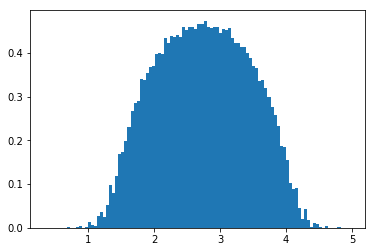

In [12]:


h = []
for i in range(5000):
    adj = rand_conn_adj_mat(30)
    deg = np.diag(adj.sum(axis=0))
    lap = deg - adj
    evals = np.real(scipy.linalg.eigvals(lap).tolist())
    evals = [x for x in evals if x>0]
    deg_list = adj.sum(axis=0).tolist()
    #h += deg_list
    for l in evals: 
        if l>.000001: h.append(l/np.sqrt(30))
print(len(h))

plt.hist(h,density=True,bins = 100)
#plt.hist(h,density=True,bins=30, range=[0,15])


NameError: name 'd_e' is not defined

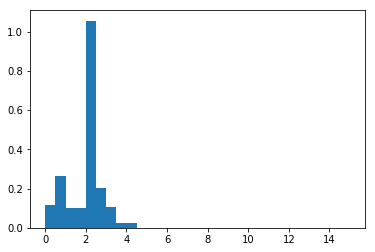

In [4]:
plt.hist(h,density=True,bins=30, range=[0,15])
random.shuffle(d_e)

plt.axvline(min(d_e), color='k', linestyle='dashed', linewidth=1)
plt.axvline(max(d_e), color='k', linestyle='dashed', linewidth=1)



random.shuffle(d_e)

plt.axvline(min(d_e), color='k', linestyle='dashed', linewidth=1)
plt.axvline(max(d_e), color='k', linestyle='dashed', linewidth=1)

In [13]:
new_vals = []
maxes = {}
mins = {}
means = {}
medians = {}
df_cd = gpd.read_file('cd_us.shp')
state_no='all'
# (somewhat unnecessarily) loop over all rows in the DataFrame
for ind, row in df_cd.iterrows():

    # grab the identifying information
    fcode = row['STATECD']
    st = row['STATEFP']
    fn = fcode[0:2]+'_'+fcode

    # if this row is something we need to compute:

    if st==state_no or state_no=='all':
    # read in the corresponding district's adjacency matrix
        # [see README in the adj_mats folder for more info]
        adj = np.loadtxt('adj_mats/'+fn+'_dist.txt',
                         delimiter=',')

        # make sure it's an integer matrix
        adj = adj.astype(int)

        g = nx.from_numpy_matrix(adj)
        # you can build a laplacian matrix
        deg = np.diag(adj.sum(axis=0))
        lap = deg - adj
        evals = np.real(scipy.linalg.eigvals(lap)).tolist()
        evals = [x for x in evals if x>0]
        new_vals += adj.sum(axis=0).tolist()
        maxes[fcode] = np.max(evals)
        mins[fcode] = np.min(evals)
        means[fcode] = np.mean(evals)
        medians[fcode] = np.median(evals)
        
        

In [10]:

dist = np.loadtxt('adj_mats/17_1715_dist.txt',delimiter=',')
lap_d  = np.diag(dist.sum(axis=0)) - dist
d_e = np.real(scipy.linalg.eigvals(lap_d))

dist = np.loadtxt('adj_mats/17_1704_dist.txt',delimiter=',')
lap_d  = np.diag(dist.sum(axis=0)) - dist
d_t = np.real(scipy.linalg.eigvals(lap_d))


d_e = [x for x in d_e if x>0]
d_t = [x for x in d_t if x>0]



#plt.hist(new_vals, density=True, bins=100, range = [0,30])
random.shuffle(d_e)
random.shuffle(d_t)


#for c in d_e[:20]: plt.axvline(c, color='k', linestyle='dashed', linewidth=1)
#for c in d_t[:20]: plt.axvline(c, color='r', linestyle='dashed', linewidth=1)
plt.figure(figsize=(12,12))
plt.hist(new_vals, color = 'green', density = True, bins=100,range=[0,25])
#plt.hist(d_e, bins=10, alpha=.3, density=True, color='green',range=[0,25])
#plt.hist(d_t, bins=10, alpha = .3, density= True, color='red',range=[0,25])
#plt.hist(new_vals, bins=20, alpha=.3, density=True, color='blue', range=[0,25])

#plt.hist(maxes.values(),bins=200, color='blue', alpha = .5)
#plt.hist([x for x in mins.values()],bins=200, color='red', alpha = .5)


NameError: name 'new_vals' is not defined

<Figure size 864x864 with 0 Axes>